In [47]:
import pprint
import json

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [2]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [3]:
keras.__version__

'2.4.0'

In [4]:
insurance_df = pd.read_csv('insurance.csv')

In [5]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
insurance_df.shape

(1338, 7)

In [7]:
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
insurance_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
insurance_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
insurance_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

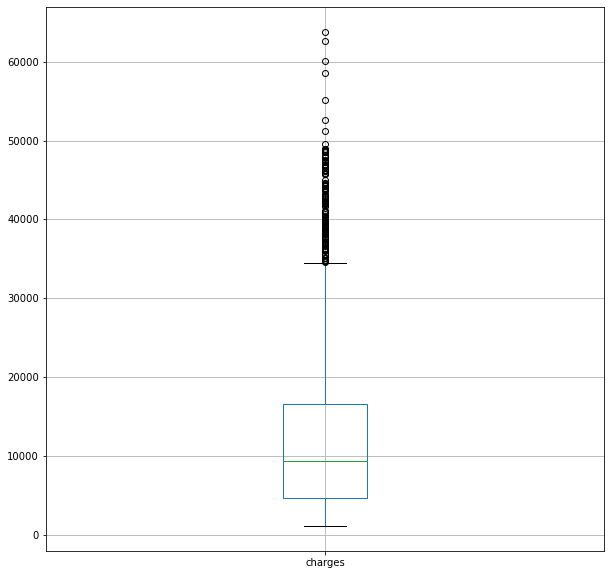

In [11]:
plt.figure(figsize = (10,10))
insurance_df.boxplot('charges')
plt.show()


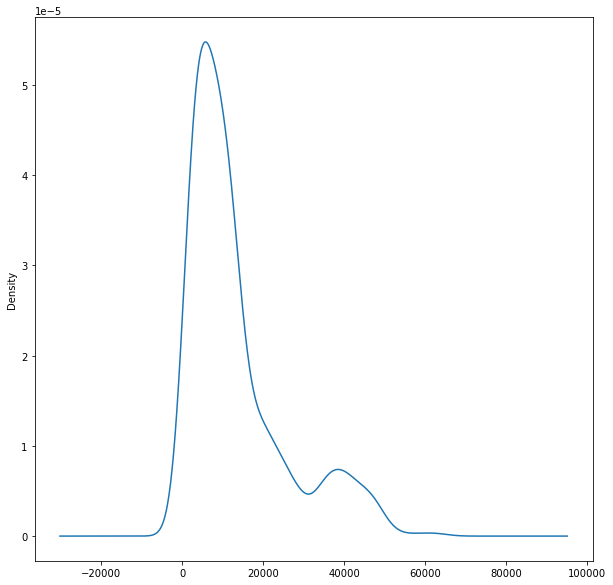

In [12]:
plt.figure(figsize = (10,10))
insurance_df['charges'].plot.kde() #kde curve gives the probability distribution curve of data
plt.show()


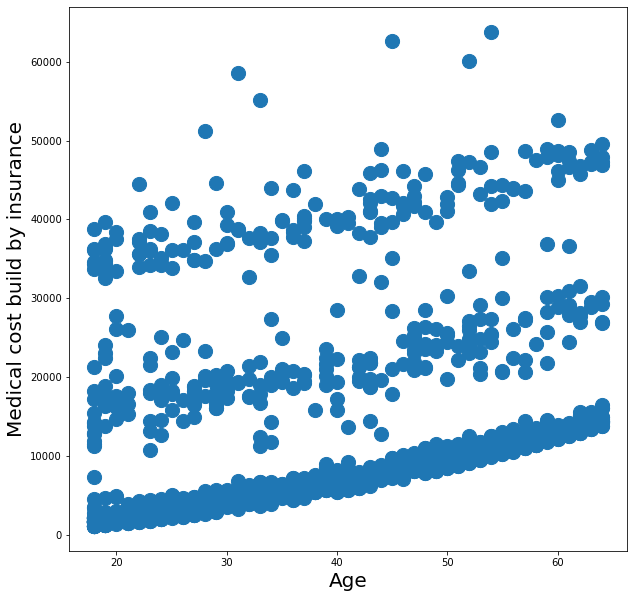

In [13]:
plt.figure(figsize = (10,10))

plt.scatter(insurance_df['age'],insurance_df['charges'],s = 200)

plt.xlabel('Age',fontsize = 20)
plt.ylabel('Medical cost build by insurance', fontsize = 20)
plt.show()

In [14]:
feature = insurance_df.drop('charges', axis = 1)
target = insurance_df['charges']

In [15]:
categorical_feature = feature[['sex','smoker','region']].copy()
categorical_feature.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [16]:
numeric_feature = feature.drop(['sex','smoker','region'], axis = 1)

In [17]:
numeric_feature.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [18]:
gender_dict = {'male':1,'female':0}
categorical_feature['sex'].replace(gender_dict,inplace = True)

In [19]:
categorical_feature.head()

,sex,smoker,region
0,0,yes,southwest
1,1,no,southeast
2,1,no,southeast
3,1,no,northwest
4,1,no,northwest


In [20]:
gender_dict = {'yes':1,'no':0}
categorical_feature['smoker'].replace(gender_dict,inplace = True)

In [21]:
categorical_feature.head()

,sex,smoker,region
0,0,1,southwest
1,1,0,southeast
2,1,0,southeast
3,1,0,northwest
4,1,0,northwest


In [22]:
categorical_feature = pd.get_dummies(categorical_feature, columns = ['region'])
categorical_feature.head()

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,0,0,1
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0


In [23]:
numeric_feature.describe() #here you can see the numeric feature has very different range so need to do scalling here

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


In [24]:
StandardScaler = StandardScaler()

numeric_feature = pd.DataFrame(StandardScaler.fit_transform(numeric_feature), columns = numeric_feature.columns, index = numeric_feature.index)
numeric_feature.describe()

,age,bmi,children
count,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.853691e-16,-1.869041e-16,2.721623e-17
std,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-2.412011e+00,-9.086137e-01
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02
75%,8.396738e-01,6.611572e-01,7.510793e-01
max,1.765289e+00,3.685522e+00,3.240619e+00


In [25]:
processed_feature = pd.concat([numeric_feature, categorical_feature], axis = 1,sort = False)
processed_feature.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,1,0,0,0,1,0
2,-0.797954,0.383307,1.580926,1,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,1,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,1,0,0,1,0,0


In [26]:
processed_data = pd.concat([processed_feature, target], axis = 1, sort = False)

In [27]:
processed_data.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,-0.453320,-0.908614,0,1,0,0,0,1,16884.92400
1,-1.509965,0.509621,-0.078767,1,0,0,0,1,0,1725.55230
2,-0.797954,0.383307,1.580926,1,0,0,0,1,0,4449.46200
3,-0.441948,-1.305531,-0.908614,1,0,0,1,0,0,21984.47061
4,-0.513149,-0.292556,-0.908614,1,0,0,1,0,0,3866.85520


In [28]:
processed_data.to_csv('insurance_processed.csv', index = False)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(processed_feature, target, test_size = 0.2,random_state = 40)

In [30]:
X_train.shape

(1070, 9)

In [31]:
y_train.shape

(1070,)

In [32]:
def build_model():
    model = Sequential()
    model.add(Dense(32,activation = 'relu',input_shape = [len(X_train.keys())])),
    model.add(Dense(64,activation = 'relu')),
    model.add(Dense(1))
    
    model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'mean_squared_error', metrics = ['mae','mse'])
    
    return model


In [33]:
model_relu_64 = build_model()

In [34]:
model_relu_64.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [35]:
training_hist = model_relu_64.fit(X_train,y_train,epochs = 1000,validation_split = 0.2, verbose = True)

Epoch 1/1000
27/27 [==============================] - 0s 11ms/step - loss: 301649760.0000 - mae: 12824.6748 - mse: 301649760.0000 - val_loss: 409279488.0000 - val_mae: 15294.3652 - val_mse: 409279488.0000
Epoch 2/1000
27/27 [==============================] - 0s 3ms/step - loss: 301595744.0000 - mae: 12822.7178 - mse: 301595744.0000 - val_loss: 409189856.0000 - val_mae: 15291.6230 - val_mse: 409189856.0000
Epoch 3/1000
27/27 [==============================] - 0s 2ms/step - loss: 301480480.0000 - mae: 12818.5693 - mse: 301480480.0000 - val_loss: 408986720.0000 - val_mae: 15285.5234 - val_mse: 408986720.0000
Epoch 4/1000
27/27 [==============================] - 0s 7ms/step - loss: 301235200.0000 - mae: 12809.9307 - mse: 301235200.0000 - val_loss: 408569952.0000 - val_mae: 15273.2393 - val_mse: 408569952.0000
Epoch 5/1000
27/27 [==============================] - 0s 5ms/step - loss: 300763328.0000 - mae: 12793.7061 - mse: 300763328.0000 - val_loss: 407810560.0000 - val_mae: 15251.2871 - val

27/27 [==============================] - 0s 2ms/step - loss: 86038232.0000 - mae: 6903.9321 - mse: 86038232.0000 - val_loss: 113848168.0000 - val_mae: 7833.3130 - val_mse: 113848168.0000
Epoch 42/1000
27/27 [==============================] - 0s 2ms/step - loss: 85158424.0000 - mae: 6893.2222 - mse: 85158424.0000 - val_loss: 112559184.0000 - val_mae: 7812.3604 - val_mse: 112559184.0000
Epoch 43/1000
27/27 [==============================] - 0s 2ms/step - loss: 84339032.0000 - mae: 6889.2896 - mse: 84339032.0000 - val_loss: 111225032.0000 - val_mae: 7790.4766 - val_mse: 111225032.0000
Epoch 44/1000
27/27 [==============================] - 0s 2ms/step - loss: 83534688.0000 - mae: 6881.8096 - mse: 83534688.0000 - val_loss: 109922896.0000 - val_mae: 7764.5845 - val_mse: 109922896.0000
Epoch 45/1000
27/27 [==============================] - 0s 2ms/step - loss: 82727176.0000 - mae: 6863.9077 - mse: 82727176.0000 - val_loss: 108784400.0000 - val_mae: 7738.4312 - val_mse: 108784408.0000
Epoch 46/

27/27 [==============================] - 0s 2ms/step - loss: 54674140.0000 - mae: 5580.7964 - mse: 54674140.0000 - val_loss: 73410896.0000 - val_mae: 6384.5503 - val_mse: 73410896.0000
Epoch 83/1000
27/27 [==============================] - 0s 2ms/step - loss: 53961452.0000 - mae: 5551.2651 - mse: 53961452.0000 - val_loss: 72634016.0000 - val_mae: 6343.2612 - val_mse: 72634016.0000
Epoch 84/1000
27/27 [==============================] - 0s 2ms/step - loss: 53245540.0000 - mae: 5508.2109 - mse: 53245540.0000 - val_loss: 71771632.0000 - val_mae: 6312.6992 - val_mse: 71771632.0000
Epoch 85/1000
27/27 [==============================] - 0s 2ms/step - loss: 52536656.0000 - mae: 5477.1587 - mse: 52536656.0000 - val_loss: 70854904.0000 - val_mae: 6276.2866 - val_mse: 70854904.0000
Epoch 86/1000
27/27 [==============================] - 0s 2ms/step - loss: 51815864.0000 - mae: 5439.9458 - mse: 51815864.0000 - val_loss: 70097984.0000 - val_mae: 6232.4355 - val_mse: 70097984.0000
Epoch 87/1000
27/27

27/27 [==============================] - 0s 2ms/step - loss: 34251024.0000 - mae: 4248.3965 - mse: 34251024.0000 - val_loss: 50286112.0000 - val_mae: 5030.8101 - val_mse: 50286112.0000
Epoch 124/1000
27/27 [==============================] - 0s 2ms/step - loss: 34024880.0000 - mae: 4216.3770 - mse: 34024880.0000 - val_loss: 50170736.0000 - val_mae: 5014.6797 - val_mse: 50170736.0000
Epoch 125/1000
27/27 [==============================] - 0s 2ms/step - loss: 33926012.0000 - mae: 4225.4673 - mse: 33926012.0000 - val_loss: 49809196.0000 - val_mae: 5012.2705 - val_mse: 49809196.0000
Epoch 126/1000
27/27 [==============================] - 0s 2ms/step - loss: 33688512.0000 - mae: 4160.3608 - mse: 33688512.0000 - val_loss: 49991096.0000 - val_mae: 4961.9990 - val_mse: 49991096.0000
Epoch 127/1000
27/27 [==============================] - 0s 3ms/step - loss: 33513008.0000 - mae: 4135.2124 - mse: 33513008.0000 - val_loss: 49723228.0000 - val_mae: 4950.3716 - val_mse: 49723228.0000
Epoch 128/1000


27/27 [==============================] - 0s 2ms/step - loss: 31235428.0000 - mae: 3737.0403 - mse: 31235428.0000 - val_loss: 47696172.0000 - val_mae: 4621.6343 - val_mse: 47696172.0000
Epoch 165/1000
27/27 [==============================] - 0s 2ms/step - loss: 31214262.0000 - mae: 3720.9102 - mse: 31214262.0000 - val_loss: 47736596.0000 - val_mae: 4616.1504 - val_mse: 47736596.0000
Epoch 166/1000
27/27 [==============================] - 0s 2ms/step - loss: 31190732.0000 - mae: 3730.7366 - mse: 31190732.0000 - val_loss: 47572012.0000 - val_mae: 4615.5957 - val_mse: 47572012.0000
Epoch 167/1000
27/27 [==============================] - 0s 2ms/step - loss: 31158714.0000 - mae: 3725.0491 - mse: 31158714.0000 - val_loss: 47677604.0000 - val_mae: 4614.5718 - val_mse: 47677604.0000
Epoch 168/1000
27/27 [==============================] - 0s 2ms/step - loss: 31124970.0000 - mae: 3718.6904 - mse: 31124970.0000 - val_loss: 47652420.0000 - val_mae: 4609.0161 - val_mse: 47652420.0000
Epoch 169/1000


27/27 [==============================] - 0s 3ms/step - loss: 30134764.0000 - mae: 3616.3123 - mse: 30134764.0000 - val_loss: 46487672.0000 - val_mae: 4525.2095 - val_mse: 46487672.0000
Epoch 206/1000
27/27 [==============================] - 0s 2ms/step - loss: 30048778.0000 - mae: 3621.8643 - mse: 30048778.0000 - val_loss: 46302632.0000 - val_mae: 4526.6865 - val_mse: 46302632.0000
Epoch 207/1000
27/27 [==============================] - 0s 2ms/step - loss: 30035366.0000 - mae: 3627.8022 - mse: 30035366.0000 - val_loss: 46383624.0000 - val_mae: 4525.9473 - val_mse: 46383624.0000
Epoch 208/1000
27/27 [==============================] - 0s 2ms/step - loss: 30010974.0000 - mae: 3627.0081 - mse: 30010974.0000 - val_loss: 46296620.0000 - val_mae: 4524.4932 - val_mse: 46296620.0000
Epoch 209/1000
27/27 [==============================] - 0s 2ms/step - loss: 29976352.0000 - mae: 3622.3748 - mse: 29976352.0000 - val_loss: 46199932.0000 - val_mae: 4519.9922 - val_mse: 46199932.0000
Epoch 210/1000


27/27 [==============================] - 0s 2ms/step - loss: 28881188.0000 - mae: 3536.6365 - mse: 28881188.0000 - val_loss: 45088752.0000 - val_mae: 4448.0161 - val_mse: 45088752.0000
Epoch 247/1000
27/27 [==============================] - 0s 3ms/step - loss: 28855012.0000 - mae: 3527.5645 - mse: 28855012.0000 - val_loss: 45097488.0000 - val_mae: 4435.9268 - val_mse: 45097488.0000
Epoch 248/1000
27/27 [==============================] - 0s 3ms/step - loss: 28822442.0000 - mae: 3528.5786 - mse: 28822442.0000 - val_loss: 45042556.0000 - val_mae: 4442.3062 - val_mse: 45042556.0000
Epoch 249/1000
27/27 [==============================] - 0s 2ms/step - loss: 28790846.0000 - mae: 3520.8394 - mse: 28790846.0000 - val_loss: 45018180.0000 - val_mae: 4431.8320 - val_mse: 45018180.0000
Epoch 250/1000
27/27 [==============================] - 0s 2ms/step - loss: 28764026.0000 - mae: 3514.2058 - mse: 28764026.0000 - val_loss: 45117652.0000 - val_mae: 4442.6074 - val_mse: 45117652.0000
Epoch 251/1000


27/27 [==============================] - 0s 3ms/step - loss: 27582686.0000 - mae: 3385.0815 - mse: 27582686.0000 - val_loss: 43768540.0000 - val_mae: 4316.6343 - val_mse: 43768540.0000
Epoch 288/1000
27/27 [==============================] - 0s 4ms/step - loss: 27544932.0000 - mae: 3384.7593 - mse: 27544932.0000 - val_loss: 43647620.0000 - val_mae: 4308.6128 - val_mse: 43647620.0000
Epoch 289/1000
27/27 [==============================] - 0s 2ms/step - loss: 27507116.0000 - mae: 3376.5552 - mse: 27507116.0000 - val_loss: 43647680.0000 - val_mae: 4299.1885 - val_mse: 43647680.0000
Epoch 290/1000
27/27 [==============================] - 0s 2ms/step - loss: 27483558.0000 - mae: 3369.1831 - mse: 27483558.0000 - val_loss: 43672400.0000 - val_mae: 4300.6064 - val_mse: 43672400.0000
Epoch 291/1000
27/27 [==============================] - 0s 2ms/step - loss: 27428988.0000 - mae: 3366.6318 - mse: 27428988.0000 - val_loss: 43521928.0000 - val_mae: 4290.5063 - val_mse: 43521928.0000
Epoch 292/1000


27/27 [==============================] - 0s 2ms/step - loss: 26115216.0000 - mae: 3199.6606 - mse: 26115216.0000 - val_loss: 41918528.0000 - val_mae: 4115.4395 - val_mse: 41918528.0000
Epoch 329/1000
27/27 [==============================] - 0s 3ms/step - loss: 26085462.0000 - mae: 3196.1597 - mse: 26085462.0000 - val_loss: 41924560.0000 - val_mae: 4111.9424 - val_mse: 41924560.0000
Epoch 330/1000
27/27 [==============================] - 0s 2ms/step - loss: 26045272.0000 - mae: 3195.1052 - mse: 26045272.0000 - val_loss: 41870820.0000 - val_mae: 4116.7373 - val_mse: 41870820.0000
Epoch 331/1000
27/27 [==============================] - 0s 2ms/step - loss: 26004600.0000 - mae: 3190.8142 - mse: 26004600.0000 - val_loss: 41842372.0000 - val_mae: 4103.5186 - val_mse: 41842372.0000
Epoch 332/1000
27/27 [==============================] - 0s 2ms/step - loss: 25974798.0000 - mae: 3182.7444 - mse: 25974798.0000 - val_loss: 41840792.0000 - val_mae: 4100.4712 - val_mse: 41840792.0000
Epoch 333/1000


27/27 [==============================] - 0s 2ms/step - loss: 24952506.0000 - mae: 3040.7698 - mse: 24952506.0000 - val_loss: 40442780.0000 - val_mae: 3970.2480 - val_mse: 40442780.0000
Epoch 370/1000
27/27 [==============================] - 0s 3ms/step - loss: 24879730.0000 - mae: 3043.0786 - mse: 24879730.0000 - val_loss: 40338488.0000 - val_mae: 3968.3826 - val_mse: 40338488.0000
Epoch 371/1000
27/27 [==============================] - 0s 2ms/step - loss: 24863206.0000 - mae: 3047.3813 - mse: 24863206.0000 - val_loss: 40259588.0000 - val_mae: 3971.8923 - val_mse: 40259588.0000
Epoch 372/1000
27/27 [==============================] - 0s 2ms/step - loss: 24843518.0000 - mae: 3038.6702 - mse: 24843518.0000 - val_loss: 40351992.0000 - val_mae: 3958.8809 - val_mse: 40351992.0000
Epoch 373/1000
27/27 [==============================] - 0s 2ms/step - loss: 24805892.0000 - mae: 3020.8774 - mse: 24805892.0000 - val_loss: 40330776.0000 - val_mae: 3954.9373 - val_mse: 40330776.0000
Epoch 374/1000


27/27 [==============================] - 0s 3ms/step - loss: 23889848.0000 - mae: 2911.2432 - mse: 23889848.0000 - val_loss: 39014088.0000 - val_mae: 3833.0793 - val_mse: 39014088.0000
Epoch 411/1000
27/27 [==============================] - 0s 2ms/step - loss: 23860794.0000 - mae: 2904.5063 - mse: 23860794.0000 - val_loss: 38949736.0000 - val_mae: 3829.3167 - val_mse: 38949736.0000
Epoch 412/1000
27/27 [==============================] - 0s 2ms/step - loss: 23840052.0000 - mae: 2911.7917 - mse: 23840052.0000 - val_loss: 38818212.0000 - val_mae: 3833.1594 - val_mse: 38818212.0000
Epoch 413/1000
27/27 [==============================] - 0s 2ms/step - loss: 23819176.0000 - mae: 2905.0586 - mse: 23819176.0000 - val_loss: 38911320.0000 - val_mae: 3823.8831 - val_mse: 38911320.0000
Epoch 414/1000
27/27 [==============================] - 0s 2ms/step - loss: 23798618.0000 - mae: 2910.6577 - mse: 23798618.0000 - val_loss: 38762524.0000 - val_mae: 3826.7004 - val_mse: 38762524.0000
Epoch 415/1000


27/27 [==============================] - 0s 3ms/step - loss: 22967858.0000 - mae: 2821.2651 - mse: 22967858.0000 - val_loss: 37448116.0000 - val_mae: 3707.8511 - val_mse: 37448116.0000
Epoch 452/1000
27/27 [==============================] - 0s 2ms/step - loss: 22917758.0000 - mae: 2803.9087 - mse: 22917758.0000 - val_loss: 37513000.0000 - val_mae: 3695.0862 - val_mse: 37513000.0000
Epoch 453/1000
27/27 [==============================] - 0s 2ms/step - loss: 22906902.0000 - mae: 2785.1687 - mse: 22906902.0000 - val_loss: 37490856.0000 - val_mae: 3691.5464 - val_mse: 37490856.0000
Epoch 454/1000
27/27 [==============================] - 0s 2ms/step - loss: 22881974.0000 - mae: 2790.3740 - mse: 22881974.0000 - val_loss: 37417724.0000 - val_mae: 3689.3760 - val_mse: 37417724.0000
Epoch 455/1000
27/27 [==============================] - 0s 2ms/step - loss: 22861288.0000 - mae: 2785.2109 - mse: 22861288.0000 - val_loss: 37424340.0000 - val_mae: 3681.8730 - val_mse: 37424340.0000
Epoch 456/1000


27/27 [==============================] - 0s 2ms/step - loss: 22173078.0000 - mae: 2738.7244 - mse: 22173078.0000 - val_loss: 36202944.0000 - val_mae: 3620.9822 - val_mse: 36202944.0000
Epoch 493/1000
27/27 [==============================] - 0s 2ms/step - loss: 22158716.0000 - mae: 2737.5046 - mse: 22158716.0000 - val_loss: 36166800.0000 - val_mae: 3617.5403 - val_mse: 36166800.0000
Epoch 494/1000
27/27 [==============================] - 0s 2ms/step - loss: 22148920.0000 - mae: 2726.1577 - mse: 22148920.0000 - val_loss: 36217000.0000 - val_mae: 3602.6194 - val_mse: 36217000.0000
Epoch 495/1000
27/27 [==============================] - 0s 2ms/step - loss: 22124488.0000 - mae: 2722.9968 - mse: 22124488.0000 - val_loss: 36161324.0000 - val_mae: 3611.5422 - val_mse: 36161324.0000
Epoch 496/1000
27/27 [==============================] - 0s 2ms/step - loss: 22113318.0000 - mae: 2723.4678 - mse: 22113318.0000 - val_loss: 36151180.0000 - val_mae: 3601.5139 - val_mse: 36151180.0000
Epoch 497/1000


27/27 [==============================] - 0s 4ms/step - loss: 21612850.0000 - mae: 2694.2788 - mse: 21612850.0000 - val_loss: 35281012.0000 - val_mae: 3553.9543 - val_mse: 35281012.0000
Epoch 534/1000
27/27 [==============================] - 0s 3ms/step - loss: 21593868.0000 - mae: 2687.0635 - mse: 21593868.0000 - val_loss: 35292176.0000 - val_mae: 3549.3435 - val_mse: 35292176.0000
Epoch 535/1000
27/27 [==============================] - 0s 3ms/step - loss: 21588296.0000 - mae: 2674.6560 - mse: 21588296.0000 - val_loss: 35229908.0000 - val_mae: 3541.3582 - val_mse: 35229908.0000
Epoch 536/1000
27/27 [==============================] - 0s 4ms/step - loss: 21571196.0000 - mae: 2680.1606 - mse: 21571196.0000 - val_loss: 35256556.0000 - val_mae: 3538.3838 - val_mse: 35256556.0000
Epoch 537/1000
27/27 [==============================] - 0s 3ms/step - loss: 21571034.0000 - mae: 2665.9866 - mse: 21571034.0000 - val_loss: 35220264.0000 - val_mae: 3538.6006 - val_mse: 35220264.0000
Epoch 538/1000


27/27 [==============================] - 0s 2ms/step - loss: 21175404.0000 - mae: 2653.0205 - mse: 21175404.0000 - val_loss: 34486312.0000 - val_mae: 3498.4961 - val_mse: 34486312.0000
Epoch 575/1000
27/27 [==============================] - 0s 2ms/step - loss: 21157106.0000 - mae: 2651.2781 - mse: 21157106.0000 - val_loss: 34466432.0000 - val_mae: 3499.3188 - val_mse: 34466432.0000
Epoch 576/1000
27/27 [==============================] - 0s 2ms/step - loss: 21149984.0000 - mae: 2660.1211 - mse: 21149984.0000 - val_loss: 34470184.0000 - val_mae: 3500.5422 - val_mse: 34470184.0000
Epoch 577/1000
27/27 [==============================] - 0s 3ms/step - loss: 21152692.0000 - mae: 2634.1448 - mse: 21152692.0000 - val_loss: 34502860.0000 - val_mae: 3484.3376 - val_mse: 34502860.0000
Epoch 578/1000
27/27 [==============================] - 0s 4ms/step - loss: 21140172.0000 - mae: 2631.7258 - mse: 21140172.0000 - val_loss: 34441968.0000 - val_mae: 3492.8484 - val_mse: 34441968.0000
Epoch 579/1000


Epoch 615/1000
27/27 [==============================] - 0s 4ms/step - loss: 20835658.0000 - mae: 2634.7559 - mse: 20835658.0000 - val_loss: 33899604.0000 - val_mae: 3464.2427 - val_mse: 33899604.0000
Epoch 616/1000
27/27 [==============================] - 0s 3ms/step - loss: 20824794.0000 - mae: 2630.4539 - mse: 20824794.0000 - val_loss: 33909736.0000 - val_mae: 3457.8413 - val_mse: 33909736.0000
Epoch 617/1000
27/27 [==============================] - 0s 2ms/step - loss: 20819878.0000 - mae: 2625.7786 - mse: 20819878.0000 - val_loss: 33890584.0000 - val_mae: 3457.0149 - val_mse: 33890584.0000
Epoch 618/1000
27/27 [==============================] - 0s 2ms/step - loss: 20809740.0000 - mae: 2614.6670 - mse: 20809740.0000 - val_loss: 33888052.0000 - val_mae: 3444.3948 - val_mse: 33888052.0000
Epoch 619/1000
27/27 [==============================] - 0s 2ms/step - loss: 20804610.0000 - mae: 2609.8765 - mse: 20804610.0000 - val_loss: 33925464.0000 - val_mae: 3449.9583 - val_mse: 33925464.0000


Epoch 656/1000
27/27 [==============================] - 0s 2ms/step - loss: 20568596.0000 - mae: 2598.0679 - mse: 20568596.0000 - val_loss: 33490580.0000 - val_mae: 3429.9644 - val_mse: 33490580.0000
Epoch 657/1000
27/27 [==============================] - 0s 2ms/step - loss: 20573074.0000 - mae: 2602.7393 - mse: 20573074.0000 - val_loss: 33428468.0000 - val_mae: 3433.1504 - val_mse: 33428468.0000
Epoch 658/1000
27/27 [==============================] - 0s 2ms/step - loss: 20561196.0000 - mae: 2611.7668 - mse: 20561196.0000 - val_loss: 33478600.0000 - val_mae: 3431.5554 - val_mse: 33478600.0000
Epoch 659/1000
27/27 [==============================] - 0s 2ms/step - loss: 20563976.0000 - mae: 2611.2759 - mse: 20563976.0000 - val_loss: 33444038.0000 - val_mae: 3430.4478 - val_mse: 33444038.0000
Epoch 660/1000
27/27 [==============================] - 0s 2ms/step - loss: 20553848.0000 - mae: 2583.7549 - mse: 20553848.0000 - val_loss: 33515364.0000 - val_mae: 3415.1602 - val_mse: 33515364.0000


Epoch 697/1000
27/27 [==============================] - 0s 2ms/step - loss: 20353706.0000 - mae: 2596.7048 - mse: 20353706.0000 - val_loss: 33110494.0000 - val_mae: 3420.3552 - val_mse: 33110494.0000
Epoch 698/1000
27/27 [==============================] - 0s 2ms/step - loss: 20359438.0000 - mae: 2598.9492 - mse: 20359438.0000 - val_loss: 33174818.0000 - val_mae: 3419.5762 - val_mse: 33174818.0000
Epoch 699/1000
27/27 [==============================] - 0s 2ms/step - loss: 20359736.0000 - mae: 2592.1938 - mse: 20359736.0000 - val_loss: 33184636.0000 - val_mae: 3407.1658 - val_mse: 33184636.0000
Epoch 700/1000
27/27 [==============================] - 0s 2ms/step - loss: 20348976.0000 - mae: 2585.5615 - mse: 20348976.0000 - val_loss: 33155888.0000 - val_mae: 3412.3188 - val_mse: 33155888.0000
Epoch 701/1000
27/27 [==============================] - 0s 2ms/step - loss: 20348652.0000 - mae: 2569.3040 - mse: 20348652.0000 - val_loss: 33173064.0000 - val_mae: 3401.8809 - val_mse: 33173064.0000


Epoch 738/1000
27/27 [==============================] - 0s 3ms/step - loss: 20178270.0000 - mae: 2573.4971 - mse: 20178270.0000 - val_loss: 32859242.0000 - val_mae: 3412.9163 - val_mse: 32859242.0000
Epoch 739/1000
27/27 [==============================] - 0s 2ms/step - loss: 20176810.0000 - mae: 2566.1682 - mse: 20176810.0000 - val_loss: 32921136.0000 - val_mae: 3399.9734 - val_mse: 32921136.0000
Epoch 740/1000
27/27 [==============================] - 0s 2ms/step - loss: 20154786.0000 - mae: 2564.3047 - mse: 20154786.0000 - val_loss: 32913192.0000 - val_mae: 3396.5823 - val_mse: 32913192.0000
Epoch 741/1000
27/27 [==============================] - 0s 2ms/step - loss: 20165920.0000 - mae: 2579.2742 - mse: 20165920.0000 - val_loss: 32909320.0000 - val_mae: 3402.6604 - val_mse: 32909320.0000
Epoch 742/1000
27/27 [==============================] - 0s 2ms/step - loss: 20150662.0000 - mae: 2563.5798 - mse: 20150662.0000 - val_loss: 32966790.0000 - val_mae: 3387.3896 - val_mse: 32966790.0000


Epoch 779/1000
27/27 [==============================] - 0s 3ms/step - loss: 20010394.0000 - mae: 2552.9202 - mse: 20010394.0000 - val_loss: 32727922.0000 - val_mae: 3385.9307 - val_mse: 32727922.0000
Epoch 780/1000
27/27 [==============================] - 0s 3ms/step - loss: 20007858.0000 - mae: 2559.5178 - mse: 20007858.0000 - val_loss: 32687450.0000 - val_mae: 3399.0913 - val_mse: 32687450.0000
Epoch 781/1000
27/27 [==============================] - 0s 2ms/step - loss: 20005244.0000 - mae: 2551.3086 - mse: 20005244.0000 - val_loss: 32797938.0000 - val_mae: 3378.7485 - val_mse: 32797938.0000
Epoch 782/1000
27/27 [==============================] - 0s 2ms/step - loss: 19993540.0000 - mae: 2540.7920 - mse: 19993540.0000 - val_loss: 32737314.0000 - val_mae: 3396.6741 - val_mse: 32737314.0000
Epoch 783/1000
27/27 [==============================] - 0s 4ms/step - loss: 20001016.0000 - mae: 2572.8018 - mse: 20001016.0000 - val_loss: 32680462.0000 - val_mae: 3402.3721 - val_mse: 32680462.0000


Epoch 820/1000
27/27 [==============================] - 0s 3ms/step - loss: 19850190.0000 - mae: 2526.9475 - mse: 19850190.0000 - val_loss: 32549134.0000 - val_mae: 3381.8767 - val_mse: 32549134.0000
Epoch 821/1000
27/27 [==============================] - 0s 3ms/step - loss: 19843168.0000 - mae: 2534.6355 - mse: 19843168.0000 - val_loss: 32573106.0000 - val_mae: 3379.6423 - val_mse: 32573106.0000
Epoch 822/1000
27/27 [==============================] - 0s 4ms/step - loss: 19844094.0000 - mae: 2528.6892 - mse: 19844094.0000 - val_loss: 32583850.0000 - val_mae: 3373.3804 - val_mse: 32583850.0000
Epoch 823/1000
27/27 [==============================] - 0s 3ms/step - loss: 19849830.0000 - mae: 2543.1008 - mse: 19849830.0000 - val_loss: 32526592.0000 - val_mae: 3386.7698 - val_mse: 32526592.0000
Epoch 824/1000
27/27 [==============================] - 0s 3ms/step - loss: 19861208.0000 - mae: 2560.9294 - mse: 19861208.0000 - val_loss: 32526432.0000 - val_mae: 3386.9692 - val_mse: 32526432.0000


Epoch 861/1000
27/27 [==============================] - 0s 4ms/step - loss: 19720058.0000 - mae: 2508.2703 - mse: 19720058.0000 - val_loss: 32404168.0000 - val_mae: 3367.6113 - val_mse: 32404168.0000
Epoch 862/1000
27/27 [==============================] - 0s 3ms/step - loss: 19711420.0000 - mae: 2506.1343 - mse: 19711420.0000 - val_loss: 32422594.0000 - val_mae: 3357.3792 - val_mse: 32422594.0000
Epoch 863/1000
27/27 [==============================] - 0s 2ms/step - loss: 19701860.0000 - mae: 2506.6858 - mse: 19701860.0000 - val_loss: 32423936.0000 - val_mae: 3364.6104 - val_mse: 32423936.0000
Epoch 864/1000
27/27 [==============================] - 0s 3ms/step - loss: 19689186.0000 - mae: 2528.1943 - mse: 19689186.0000 - val_loss: 32337864.0000 - val_mae: 3388.1382 - val_mse: 32337864.0000
Epoch 865/1000
27/27 [==============================] - 0s 3ms/step - loss: 19704380.0000 - mae: 2560.1648 - mse: 19704380.0000 - val_loss: 32292354.0000 - val_mae: 3399.5457 - val_mse: 32292354.0000


Epoch 902/1000
27/27 [==============================] - 0s 3ms/step - loss: 19574932.0000 - mae: 2511.8511 - mse: 19574932.0000 - val_loss: 32228010.0000 - val_mae: 3367.4163 - val_mse: 32228010.0000
Epoch 903/1000
27/27 [==============================] - 0s 3ms/step - loss: 19567206.0000 - mae: 2507.9658 - mse: 19567206.0000 - val_loss: 32233754.0000 - val_mae: 3361.1697 - val_mse: 32233754.0000
Epoch 904/1000
27/27 [==============================] - 0s 3ms/step - loss: 19563398.0000 - mae: 2496.2288 - mse: 19563398.0000 - val_loss: 32230634.0000 - val_mae: 3362.9180 - val_mse: 32230634.0000
Epoch 905/1000
27/27 [==============================] - 0s 3ms/step - loss: 19559780.0000 - mae: 2517.7349 - mse: 19559780.0000 - val_loss: 32213898.0000 - val_mae: 3366.8899 - val_mse: 32213898.0000
Epoch 906/1000
27/27 [==============================] - 0s 3ms/step - loss: 19558222.0000 - mae: 2498.3987 - mse: 19558222.0000 - val_loss: 32301992.0000 - val_mae: 3346.9514 - val_mse: 32301992.0000


Epoch 943/1000
27/27 [==============================] - 0s 2ms/step - loss: 19440380.0000 - mae: 2476.5403 - mse: 19440380.0000 - val_loss: 32101990.0000 - val_mae: 3345.4194 - val_mse: 32101990.0000
Epoch 944/1000
27/27 [==============================] - 0s 2ms/step - loss: 19438036.0000 - mae: 2493.7498 - mse: 19438036.0000 - val_loss: 32143602.0000 - val_mae: 3348.2278 - val_mse: 32143602.0000
Epoch 945/1000
27/27 [==============================] - 0s 2ms/step - loss: 19424852.0000 - mae: 2497.5625 - mse: 19424852.0000 - val_loss: 32041602.0000 - val_mae: 3377.4578 - val_mse: 32041602.0000
Epoch 946/1000
27/27 [==============================] - 0s 2ms/step - loss: 19432584.0000 - mae: 2498.2466 - mse: 19432584.0000 - val_loss: 32044922.0000 - val_mae: 3360.8970 - val_mse: 32044922.0000
Epoch 947/1000
27/27 [==============================] - 0s 2ms/step - loss: 19415612.0000 - mae: 2506.2808 - mse: 19415612.0000 - val_loss: 32062172.0000 - val_mae: 3364.7310 - val_mse: 32062172.0000


Epoch 984/1000
27/27 [==============================] - 0s 3ms/step - loss: 19290982.0000 - mae: 2475.7749 - mse: 19290982.0000 - val_loss: 31927584.0000 - val_mae: 3355.5608 - val_mse: 31927584.0000
Epoch 985/1000
27/27 [==============================] - 0s 3ms/step - loss: 19304918.0000 - mae: 2477.4646 - mse: 19304918.0000 - val_loss: 32018924.0000 - val_mae: 3331.2883 - val_mse: 32018924.0000
Epoch 986/1000
27/27 [==============================] - 0s 3ms/step - loss: 19284850.0000 - mae: 2490.1111 - mse: 19284850.0000 - val_loss: 31881350.0000 - val_mae: 3369.4089 - val_mse: 31881350.0000
Epoch 987/1000
27/27 [==============================] - 0s 4ms/step - loss: 19307294.0000 - mae: 2483.7097 - mse: 19307294.0000 - val_loss: 31916888.0000 - val_mae: 3345.6270 - val_mse: 31916888.0000
Epoch 988/1000
27/27 [==============================] - 0s 2ms/step - loss: 19292574.0000 - mae: 2489.4390 - mse: 19292574.0000 - val_loss: 31932760.0000 - val_mae: 3349.3394 - val_mse: 31932760.0000


In [36]:
training_hist_df = pd.DataFrame(training_hist.history)
training_hist_df['epoch'] = training_hist.epoch
training_hist_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,19266690.0,2456.660645,19266690.0,31991176.0,3320.724854,31991176.0,995
996,19257230.0,2476.305420,19257230.0,31886298.0,3345.239502,31886298.0,996
997,19254414.0,2476.719238,19254414.0,31864908.0,3338.741943,31864908.0,997
998,19248668.0,2482.692139,19248668.0,31865540.0,3346.699219,31865540.0,998
999,19261700.0,2454.493652,19261700.0,31909206.0,3331.157715,31909206.0,999


In [37]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std = 2)

In [38]:
plotter

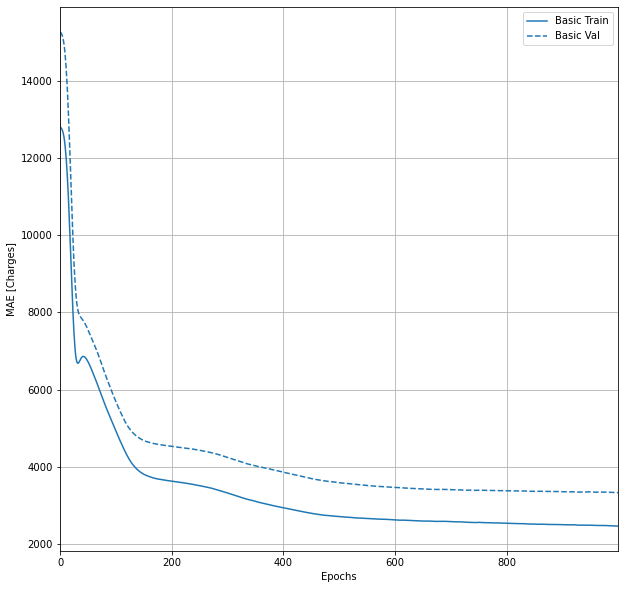

In [39]:
plt.figure(figsize =(10,10))
plotter.plot({'Basic':training_hist},metric = 'mae')
plt.ylabel('MAE [Charges]')
plt.show()

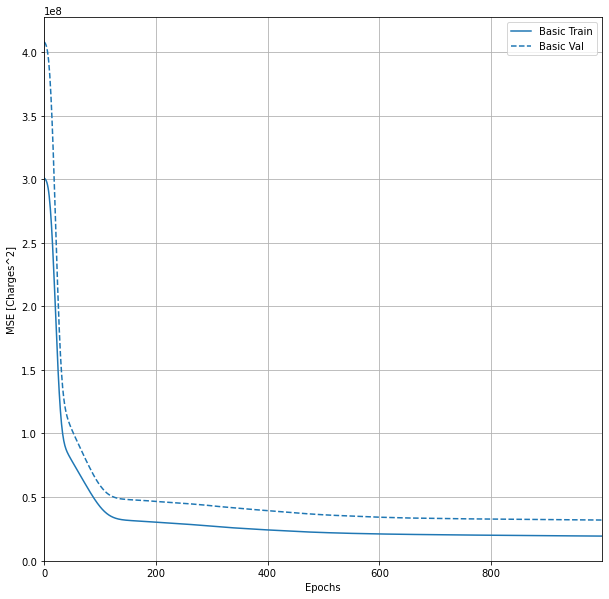

In [40]:
plt.figure(figsize =(10,10))
plotter.plot({'Basic':training_hist},metric = 'mse')
plt.ylabel('MSE [Charges^2]')
plt.show()

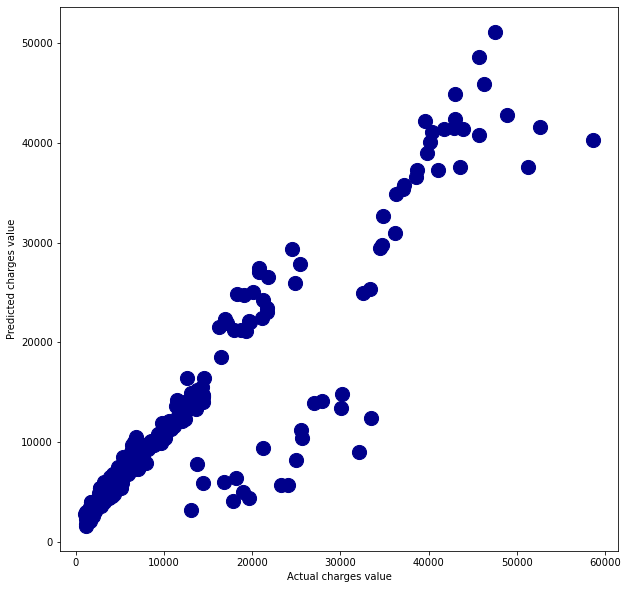

In [41]:
y_pred = model_relu_64.predict(X_test).flatten()
plt.figure(figsize = (10,10))
plt.scatter(y_test,y_pred, s = 200,c = 'darkblue')
plt.xlabel('Actual charges value')
plt.ylabel('Predicted charges value')
plt.show()

In [42]:
r2_score(y_test,y_pred)

0.8447352250736379

# Adding some Droupouts

In [48]:
def build_model_1():
    model = Sequential()
    model.add(Dense(32,activation = 'relu',input_shape = [len(X_train.keys())])),
    model.add(Dropout(0.2))
    model.add(Dense(64,activation = 'relu')),
    model.add(Dense(1))
    
    model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'mean_squared_error', metrics = ['mae','mse'])
    
    return model

In [49]:
model_elu_64 = build_model_1()

In [50]:
model_elu_64 .summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [51]:
training_hist = model_elu_64.fit(X_train,y_train,epochs = 1000,validation_split = 0.2,verbose = False,callbacks = [tfdocs.modeling.EpochDots()])


Epoch: 0, loss:301648864.0000,  mae:12824.6035,  mse:301648864.0000,  val_loss:409276672.0000,  val_mae:15294.2393,  val_mse:409276672.0000,  
....................................................................................................
Epoch: 100, loss:44103956.0000,  mae:4971.8135,  mse:44103956.0000,  val_loss:60398196.0000,  val_mae:5701.5889,  val_mse:60398196.0000,  
....................................................................................................
Epoch: 200, loss:33418594.0000,  mae:3782.9802,  mse:33418594.0000,  val_loss:47587404.0000,  val_mae:4564.7061,  val_mse:47587404.0000,  
....................................................................................................
Epoch: 300, loss:30114988.0000,  mae:3565.9097,  mse:30114988.0000,  val_loss:45097812.0000,  val_mae:4389.2095,  val_mse:45097812.0000,  
....................................................................................................
Epoch: 400, loss:27637410.0000,  ma

In [52]:
training_hist_df = pd.DataFrame(training_hist.history)
training_hist_df['epoch'] = training_hist.epoch
training_hist_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,21347360.0,2715.923584,21347360.0,31465886.0,3256.130859,31465886.0,995
996,21505132.0,2682.230713,21505132.0,31556806.0,3236.159424,31556806.0,996
997,21833562.0,2768.376221,21833562.0,31392612.0,3257.347168,31392612.0,997
998,22133720.0,2835.661133,22133720.0,31411538.0,3259.028320,31411538.0,998
999,21774522.0,2757.926025,21774522.0,31424350.0,3242.268066,31424350.0,999


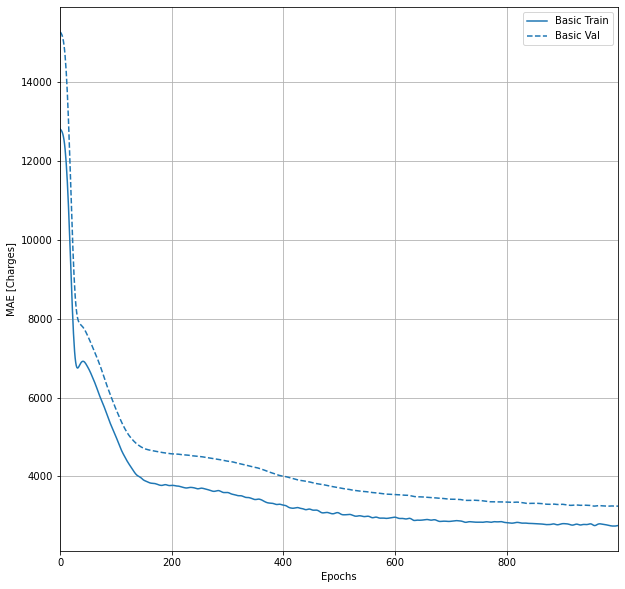

In [53]:
plt.figure(figsize =(10,10))
plotter.plot({'Basic':training_hist},metric = 'mae')
plt.ylabel('MAE [Charges]')
plt.show()

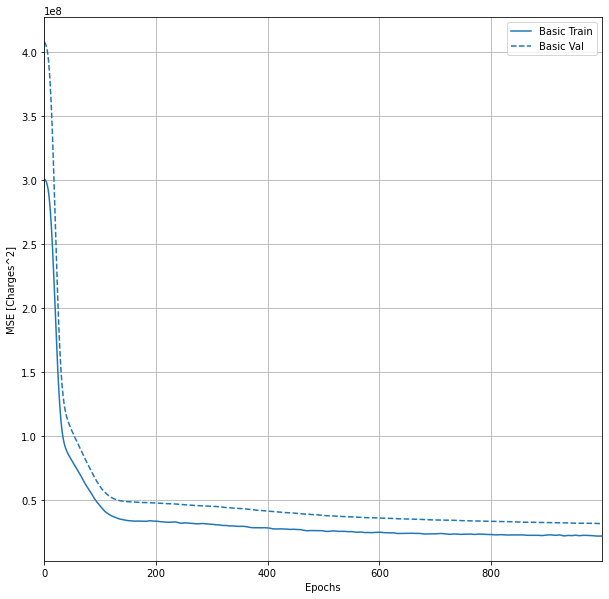

In [54]:
plt.figure(figsize =(10,10))
plotter.plot({'Basic':training_hist},metric = 'mse')
plt.ylabel('MSE [Charges^2]')
plt.show()

In [55]:
model_elu_64.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 22807032.0000 - mae: 2647.8894 - mse: 22807032.0000


[22807032.0, 2647.889404296875, 22807032.0]

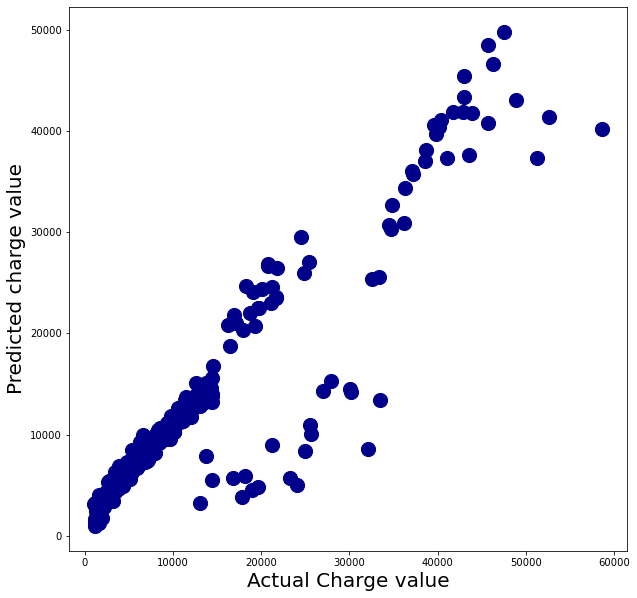

In [56]:
y_pred = model_elu_64.predict(X_test).flatten()
plt.figure(figsize = (10,10))
plt.scatter(y_test,y_pred,s = 200,c = 'darkblue')
plt.xlabel('Actual Charge value', fontsize = 20)
plt.ylabel('Predicted charge value', fontsize = 20)
plt.show()


In [57]:
r2_score(y_test,y_pred) # eventhough the r2_score is not more improved then the earlier but due to the droupout this model wil 
# be more robust. 

0.8474390587237844